## Observations and Insights

## Dependencies and starter code

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



## Summary statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [73]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [74]:
#merge data frames to merged_mouse_study on an Mouse ID, outer join
merged_mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
#sort merged_mouse_study on Tumor Volume (mm3)
merged_mouse_study = merged_mouse_study.sort_values(["Tumor Volume (mm3)"], ascending = True)
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [81]:
#calculate total, mean, median, variance, stdev, st error for summary stats table
grouped_drug_regimen = merged_mouse_study.groupby(["Drug Regimen"])
#calculate mean tumor volumes across drug regimens
grouped_drug_regimen_mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
grouped_drug_regimen_mean
#calculate median tumor volumes
grouped_drug_regimen_median= grouped_drug_regimen["Tumor Volume (mm3)"].median()
grouped_drug_regimen_median
#calculate variance in tumor volumes across drug regimens
grouped_drug_regimen_var= grouped_drug_regimen["Tumor Volume (mm3)"].var()
grouped_drug_regimen_var
#calculate stdev in tumor volumes across drug regimens
grouped_drug_regimen_std= grouped_drug_regimen["Tumor Volume (mm3)"].std()
grouped_drug_regimen_std
#calculate standard error in tumor volumes across drug regimens
grouped_drug_regimen_sem= grouped_drug_regimen["Tumor Volume (mm3)"].sem()
grouped_drug_regimen_sem
#create summary table df for above calculations across drug regimens
study_summary_stats = pd.DataFrame({"Mean": grouped_drug_regimen_mean, 
                                    "Median": grouped_drug_regimen_median, "Variance": grouped_drug_regimen_var, 
                                    "Standard Deviation": grouped_drug_regimen_std, "Standard Error": grouped_drug_regimen_sem})

study_summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
#group drug regimen and mouse id to get data points for bar plots
treatment_regimen_data = merged_mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
treatment_regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar plots

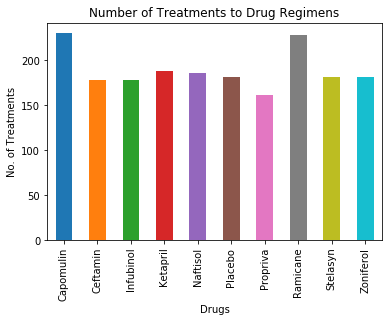

In [86]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_regimen_data.plot(kind = "bar")
#set figure labels
plt.title("Number of Treatments to Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("No. of Treatments")
#show figrue 
plt.show()

Text(0, 0.5, 'No. of Treatments')

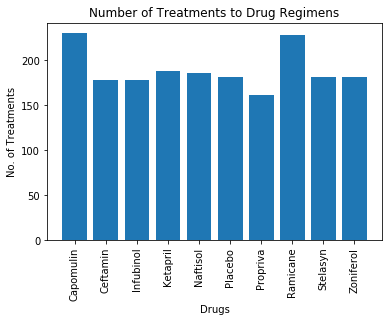

In [97]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_of_treatments = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#set figure axis and tick locations
x_axis = np.arange(len(treatment_regimen_data))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 
                            'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 
                            'Zoniferol'],  rotation = 'vertical')
#set x and y data in figure
plt.bar(x_axis, number_of_treatments, align='center')
#set figure title and labels
plt.title("Number of Treatments to Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("No. of Treatments")

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen